<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
data = pd.read_csv('data/job_listings.csv')
data.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [20]:
data.iloc[0]['description']

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [55]:
def clean_text(text):
    pat1 = r'\\n'
    pat2 = r'\\x+\d'
    pat3 = r'\\xe\d'
    pat4 = r'+\d'
    combined_pat = r'|'.join((pat1, pat2, pat3, pat4))
    soup = BeautifulSoup(text)
    cleaned_text = re.sub(combined_pat, ' ', soup.get_text())
    return cleaned_text.strip("b'").strip('"')

In [93]:
desc_column = []
for i in range(len(data)):
    description = clean_text(data.iloc[i]['description'])
    desc_column.append(description)

In [94]:
data['description'] = desc_column

In [179]:
print(data.shape)
data.head()

(426, 6)


,Unnamed: 0,description,title,SpaCytokens1,CountVectorizer,cleaned_text
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirements, conceptual, understand, ma...","(0, 1399)\t1\n (1, 4274)\t1\n (2, 5372)\t1...",job requirements conceptual understand machine...
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, , data, scientist, help, bu...","(0, 1399)\t1\n (1, 4274)\t1\n (2, 5372)\t1...",job description data scientist help build mac...
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res...","(0, 1399)\t1\n (1, 4274)\t1\n (2, 5372)\t1...",data scientist work consult business responsib...
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, $, monthcontractunder, general, supervisio...","(0, 1399)\t1\n (1, 4274)\t1\n (2, 5372)\t1...",$ $ monthcontractunder general supervision pro...
4,4,Location: USA \xe2 0 3 multiple locations 2+ y...,Data Scientist,"[location, usa, multiple, location, +, year, a...","(0, 1399)\t1\n (1, 4274)\t1\n (2, 5372)\t1...",location usa multiple location + year analytic...


## 2) Use Spacy to tokenize the listings 

In [61]:
nlp = spacy.load('en_core_web_md')
STOP_WORDS = nlp.Defaults.stop_words

In [128]:
tokens = []
for doc in nlp.pipe(data['description'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (not re.match('.*\d+', token.text)):
            doc_tokens.append(token.lemma_.lower().strip(', /'))
    tokens.append(doc_tokens)

In [129]:
data['SpaCytokens1'] = tokens

In [253]:
data.head()

,Unnamed: 0,description,title,SpaCytokens1,cleaned_text
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[job, requirements, conceptual, understand, ma...",job requirements conceptual understand machine...
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[job, description, , data, scientist, help, bu...",job description data scientist help build mac...
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, work, consult, business, res...",data scientist work consult business responsib...
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, $, monthcontractunder, general, supervisio...",$ $ monthcontractunder general supervision pro...
4,4,Location: USA \xe2 0 3 multiple locations 2+ y...,Data Scientist,"[location, usa, multiple, location, +, year, a...",location usa multiple location + year analytic...


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [134]:
data['cleaned_text'] = [' '.join(doc) for doc in data['SpaCytokens1']]

In [106]:
vect = CountVectorizer(stop_words='english')
#                        ngram_range=(1,2),
#                        min_df=3,
#                        max_df=0.25,
#                        max_features=20)

In [107]:
# for doc in data['description']:
#     print(doc)
vect.fit(data['cleaned_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [114]:
# vect.get_feature_names()
#     counts.append(vect.transform(doc))

In [110]:
dtm = vect.transform(data['cleaned_text'])

In [113]:
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm_df.shape)
dtm_df.head()

(426, 8066)


,aa,aap,ab,abernathy,abilities,ability,able,abounds,abroad,absence,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [158]:
# let's look at 10 most common words/word-pairs that appear in at least 3 docs 
# and in less than in 50% of the docs
vect = CountVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=3,
                       max_df=0.35,
                       max_features=10)

In [159]:
vect.fit(data['cleaned_text'])
dtm = vect.transform(data['cleaned_text'])
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [160]:
print(dtm_df.shape)
# dtm_df['analytic'].sum()

(426, 10)


In [161]:
words = []
counts = []
for col in dtm_df.columns:
    words.append(col)
    counts.append(dtm_df[col].sum())

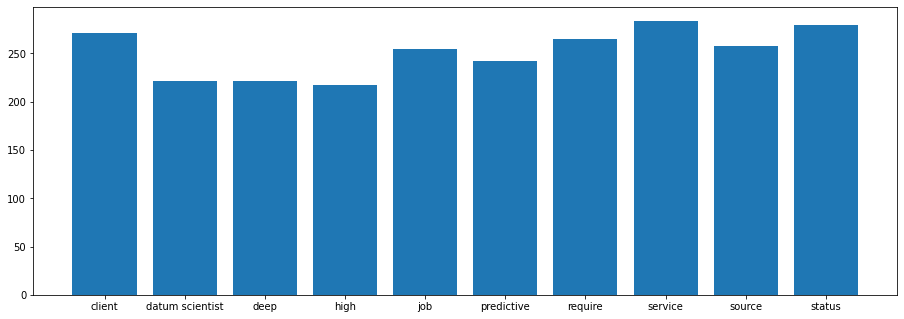

In [162]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(words,counts)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [171]:
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        min_df=3,
                        max_df=0.35,
                       max_features=10)

In [172]:
dtm_tfidf = tfidf.fit_transform(data['cleaned_text'])

In [173]:
# dir(dtm_tfidf)

In [174]:
tfidf_df = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
tfidf_df.head()

,client,datum scientist,deep,high,job,predictive,require,service,source,status
0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.00000
1,0.296267,0.0,0.0,0.497798,0.247248,0.000000,0.000000,0.73686,0.24562,0.00000
2,0.000000,0.0,0.0,0.000000,0.699961,0.714181,0.000000,0.00000,0.00000,0.00000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.425645,0.00000,0.00000,0.90489
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000


In [177]:
words = []
counts = []
for col in tfidf_df.columns:
    words.append(col)
    counts.append(tfidf_df[col].sum())

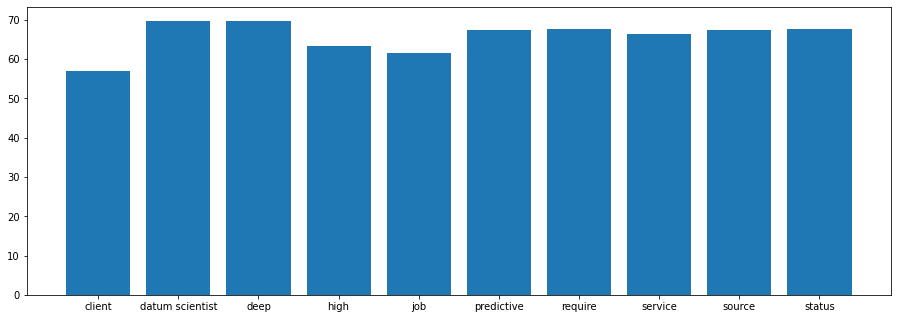

In [178]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(words,counts)
plt.show()

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [182]:
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=3,
                       max_df=0.35)

In [183]:
kk_dtm = tfidf.fit_transform(data['cleaned_text'])

In [185]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(kk_dtm)
df = pd.DataFrame(dist_matrix)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,1.000000,0.017537,0.003458,0.000000,0.000000,0.050542,0.008935,0.018045,0.024386,0.014157,...,0.022923,0.033191,0.012012,0.021372,0.018799,0.015494,0.020730,0.014487,0.038302,0.018736
1,0.017537,1.000000,0.039963,0.019885,0.003136,0.031112,0.049305,0.051361,0.064036,0.036674,...,0.070337,0.095069,0.027064,0.035347,0.045636,0.049866,0.022892,0.043525,0.057233,0.041739
2,0.003458,0.039963,1.000000,0.003002,0.022608,0.020564,0.021160,0.020245,0.014785,0.006826,...,0.016749,0.017727,0.008148,0.026635,0.028461,0.018403,0.012017,0.007279,0.030566,0.028229
3,0.000000,0.019885,0.003002,1.000000,0.000000,0.026515,0.003087,0.079493,0.024430,0.041366,...,0.020194,0.023609,0.002006,0.034587,0.027899,0.037139,0.005977,0.094862,0.067667,0.105163
4,0.000000,0.003136,0.022608,0.000000,1.000000,0.008437,0.000000,0.019065,0.011057,0.000000,...,0.008388,0.065983,0.000000,0.024749,0.000000,0.000000,0.002778,0.023241,0.014346,0.009734


In [191]:
# which documents are most similar to document 0
df[df[0] < 0.99][0].sort_values(ascending=False)[:10]

115    0.118889
274    0.082524
199    0.079056
338    0.078100
336    0.074951
403    0.072850
60     0.072486
222    0.070084
383    0.069953
138    0.067700
Name: 0, dtype: float64

In [196]:
knn_dtm_df = pd.DataFrame(kk_dtm.todense(), columns=tfidf.get_feature_names())
print(dtm.shape)
knn_dtm_df.head()

(426, 10)


,aa,aa employer,ab,ab test,abilities,ability analyze,ability apply,ability build,ability business,ability clearly,...,year technical,year work,years,years experience,yearthe,yes,york,york city,york office,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(knn_dtm_df)

# which documents are most similar to document 0 
doc = knn_dtm_df.iloc[0].values
nn.kneighbors([doc])

(array([[0.        , 1.32748737, 1.35460373, 1.35716186, 1.35786593]]),
 array([[  0, 115, 274, 199, 338]]))

In [229]:
def clean_string(text):
    """ Cleans text from stop words, numbers, punctuation
    Parameters
    ----------
    text: str

    Returns
    ---------
    cleaned text: str
    """
    doc_tokens = []
    for token in nlp(text, disable=['parser', 'tagger']):
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (not re.match('.*\d+', token.text)):
            doc_tokens.append(token.lemma_.lower().strip(', /'))
    cleaned_text = ' '.join(doc_tokens)
    return cleaned_text

In [263]:
data['description'][0]

"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

In [202]:
data['description'][115]

'Company Overview At Proofpoint, we have a passion for protecting people, data, and brands from today\\xe2 0 9s advanced threats and compliance risks. We hire the best people in the business to: Build and enhance our proven security platform Blend innovation and speed in a constantly evolving cloud architecture Analyze new threats and offer deep insight through data-driven intel Collaborate with customers to help solve their toughest security challenges We are singularly devoted to helping our customers protect what matters most. That\\xe2 0 9s why we\\xe2 0 9re a leader in next-generation cybersecurity\\xe2 0 4and why more than half of the Fortune 100 trust us as a security partner. The Role Do you have a passion for applying machine learning to hard problems in new application areas? Do you keep up with the latest on GANs, ResNets, CNNs, RNNs, and Deep Reinforcement Learning but have also mastered the classics like SVM and Random Forest? Are you looking for the opportunity to work wi

In [215]:
job_desc = 'As a Data Scientist focused on Analytics and Experimentation, you will work on an impactful team to analyze our millions of learners. We capture terabytes of data on how users engage with our platform. As Codecademy continues our rapid growth, we want to build a data-informed culture that uses hypothesis testing, experimentation, and exploratory analysis to guide our decision-making process.'

In [240]:
doc = clean_string(job_desc)
doc_dtm = tfidf.transform([doc])

In [242]:
nn.kneighbors(doc_dtm.todense())

(array([[1.30076329, 1.32698162, 1.34159657, 1.34458778, 1.35556751]]),
 array([[416, 414, 191, 385, 230]]))

In [243]:
data['description'][416]

'Los Gatos, California Science and Analytics The culture of experimentation and data-informed decision making led by Science & Analytics lies at the heart of Netflix product Innovation, and allows us to continuously evolve and improve the Netflix experience for our members around the globe.  In this role, you will collaborate with data scientists, engineers, and product managers to identify opportunities for new approaches to experimentation at Netflix. You\\xe2 0 9ll take end-to-end responsibility for all aspects of collaborative data science projects, including researching the statistical methodology, setting responsibilities and timelines, and ensuring that the end deliverable is correct, performant, and meets user requirements. You will collaborate with our platform teams to integrate new methodologies into our testing infrastructure, and communicate and evangelize these new ideas to colleagues across the company. In success, you will create and orchestrate project-focussed cross-f

In [244]:
data['description'][414]

'We are looking for a Senior Data Scientist with marketing analytics background to join the Spotify product Insights team in New York City. As part of the Growth Opportunities department, you will lead insights for a new team focused on Engineering Automated Marketing for user acquisition. Engineering Automated Marketing is the art and science of bringing the right content to the right users, at scale. Thanks to the power of Machine Learning, the depth of Spotify\\xe2 0 9s catalog and our large user base, we can enable technology that allows us to automate, measure and optimize the effectiveness of our content marketing campaigns. Think emails, push, or Facebook ads.  Acquisition Marketing focuses on driving efficient and effective registrations through advertising and we are pioneering the way in which we use data, analytics and advanced data science to execute and optimize our global marketing. You will measure and provide optimization recommendations for all Artist and Content marke

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [279]:
# Try and identify requirements for experience specific technologies that 
# are asked for in the job listings. How are those distributed among the job listings?

tech_skills = ['SQL', 'R', 'Python', 'Bayes', 'K-Means', 'SVM', 
               'Apriori', 'github', 'Logistic Regression', 'Neural', 
               'Random Forests', 'Decision Tree', 'K-NN', 'A/B testing',
               'SAS', 'NoSQL', 'Reinforcement Learning', 'AI', 
               'machine learning', 'analytic', 'predictive modelling']

tech_skills = [clean_string(skill) for skill in tech_skills]
# tech_skills

In [275]:
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       min_df=1,
                       max_df=0.7)

In [276]:
dtm = tfidf.fit_transform(data['cleaned_text'])
dtm_df = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [277]:
skills = []
counts = []
for column in dtm_df.columns:
    if column in tech_skills:
        skills.append(column)
        counts.append(dtm_df[column].sum())

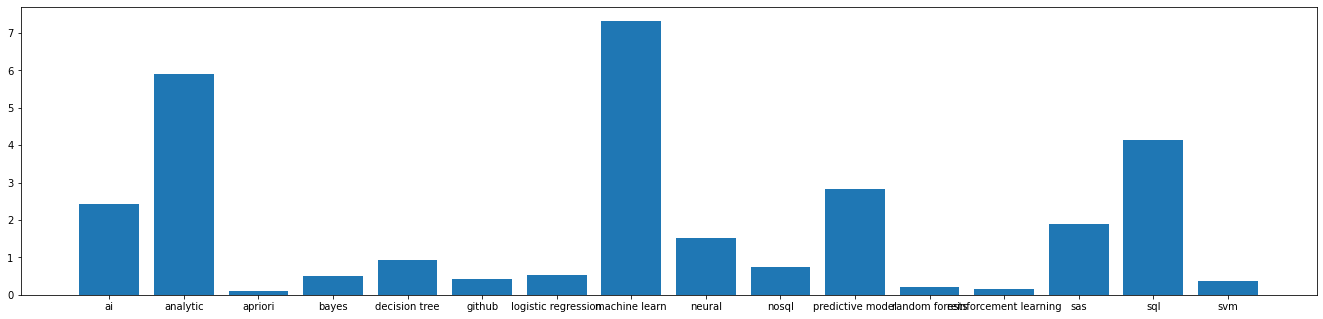

In [278]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(skills,counts)
plt.show()

In [ ]:
# Use a clustering algorithm to cluster documents by their 
# most important terms. Do the clusters reveal any common themes?

# how to identify most important terms? (not most frequent, not least frequent)
# - occurs in less than 15% of the docs 
# - at least 10 times

In [283]:
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,3),
                       min_df=10,
                       max_df=0.10,
                       max_features=30)

In [284]:
dtm = tfidf.fit_transform(data['cleaned_text'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,accommodation,activity,agency,artificial,assist,believe,brand,business intelligence,campaign,clinical,...,nlp,security,shop,states,study,summary,time series,uber,united,united states
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
words = []
counts = []
for column in dtm.columns:
    words.append(column)
    counts.append(dtm[column].sum())

words_counts = {'words':words, 'counts':counts}
words_counts_df = pd.DataFrame(words_counts).sort_values(by='counts', ascending=False)
words_counts_df

,words,counts
5,believe,27.364304
21,security,24.591828
20,nlp,24.568042
10,content,23.909634
4,assist,21.798258
2,agency,20.559020
6,brand,20.442285
7,business intelligence,20.243764
13,google,19.892886
26,time series,19.668164


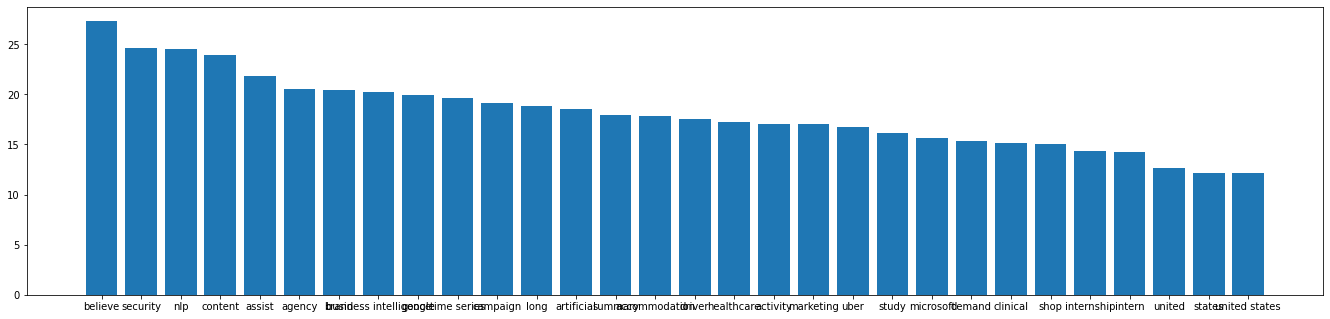

In [290]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(words_counts_df['words'], words_counts_df['counts'])
plt.show()